In [6]:
import glob
import pandas as pd
import json

projects = ["djanjo", "flask", "pytorch", "pandas"]
dfs=[]

for project in projects:
    filenames = glob.glob(f"../output/pytlint/{project}/*.json")
    for filename in filenames:
        with open(filename) as json_data:
            data = json.load(json_data)
            df = pd.json_normalize(data)
            df['project'] = project
            dfs.append(df)




In [7]:
df_py = pd.concat(dfs, ignore_index=True)

df_py.head(5)

,type,module,obj,line,column,endLine,endColumn,path,symbol,message,message-id,project
0,warning,flask.cli,FlaskGroup.list_commands,605,15,605,24,projects/py/flask/src/flask/cli.py,broad-except,Catching too general exception Exception,W0703,flask
1,warning,flask.cli,run_command,898,11,898,20,projects/py/flask/src/flask/cli.py,broad-except,Catching too general exception Exception,W0703,flask
2,warning,test_reqctx,test_teardown_with_previous_exception,39,11,39,20,projects/py/flask/tests/test_reqctx.py,broad-except,Catching too general exception Exception,W0703,flask
3,warning,test_reqctx,test_teardown_with_handled_exception,58,15,58,24,projects/py/flask/tests/test_reqctx.py,broad-except,Catching too general exception Exception,W0703,flask
4,warning,test_appctx,test_app_tearing_down_with_previous_exception,66,11,66,20,projects/py/flask/tests/test_appctx.py,broad-except,Catching too general exception Exception,W0703,flask


In [8]:
df_py.groupby(['project','message-id'])['message-id'].count()

project  message-id
flask    W0703           9
pandas   W0703          24
         W0706           2
         W0707          22
pytorch  E0702           5
         E0704           2
         W0702           4
         W0703         253
         W0706           6
         W0707           9
         W0715          11
Name: message-id, dtype: int64

In [10]:
import psycopg2

conn = psycopg2.connect("host={} user={} dbname=exception_miner password={} port={}".format("127.0.0.1", "exception_miner", "exception_miner", "5432"))
conn.set_session(autocommit=True)
cur = conn.cursor()

cur.execute("""CREATE TABLE IF NOT EXISTS exceptions_pylint (type VARCHAR(255), module VARCHAR(255), obj VARCHAR(255), beginLine INT, beginColumn INT,	endLine INT, endColumn INT, path VARCHAR(255), symbol VARCHAR(255), message VARCHAR(255), message_id VARCHAR(255), project VARCHAR(255))""")

cur.execute("""DELETE FROM exceptions_pylint;""")

for i, row in df_py.iterrows():
    #print(row)
    cur.execute(("""INSERT INTO exceptions_pylint (type, module, obj, beginLine, beginColumn, endLine, endColumn, path, symbol, message, message_id, project)
                            VALUES (%s, %s, %s, %s, %s, %s,%s, %s, %s, %s, %s, %s  );"""), list(row))

type                                           warning
module                                       flask.cli
obj                           FlaskGroup.list_commands
line                                               605
column                                              15
endLine                                            605
endColumn                                           24
path                projects/py/flask/src/flask/cli.py
symbol                                    broad-except
message       Catching too general exception Exception
message-id                                       W0703
project                                          flask
Name: 0, dtype: object
type                                           warning
module                                       flask.cli
obj                                        run_command
line                                               898
column                                              11
endLine                                   

Python Parser

In [2]:
import glob
import pandas as pd
import json

projects = ["django", "flask", "pytorch", "pandas"]
dfs=[]

for project in projects:
    #filenames = glob.glob(f"../output/parser/*.csv")
    #print(filename)
    df = pd.read_csv(f"../output/parser/{project}_stats.csv")
    df['project'] = project
    dfs.append(df)


In [3]:
df = pd.concat(dfs, ignore_index=True)
df.head(5)

,file,function,n_try_except,n_try_pass,n_generic_except,n_captures_broad_raise,n_captures_try_except_raise,n_captures_misplaced_bare_raise,project
0,/home/r4ph/desenv/exception-miner/projects/py/...,_path,0,0,0,0,0,0,django
1,/home/r4ph/desenv/exception-miner/projects/py/...,include,1,0,0,0,0,0,django
2,/home/r4ph/desenv/exception-miner/projects/py/...,_reverse_with_prefix,1,0,0,0,0,0,django
3,/home/r4ph/desenv/exception-miner/projects/py/...,reverse,0,0,0,0,0,0,django
4,/home/r4ph/desenv/exception-miner/projects/py/...,resolve_error_handler,0,0,0,0,0,0,django


In [4]:
df.shape

(119038, 9)

In [5]:
#TODO:
#Analisar Duplicados
df[df.duplicated()]

,file,function,n_try_except,n_try_pass,n_generic_except,n_captures_broad_raise,n_captures_try_except_raise,n_captures_misplaced_bare_raise,project
23,/home/r4ph/desenv/exception-miner/projects/py/...,check,0,0,0,0,0,0,django
24,/home/r4ph/desenv/exception-miner/projects/py/...,__repr__,0,0,0,0,0,0,django
25,/home/r4ph/desenv/exception-miner/projects/py/...,__init__,0,0,0,0,0,0,django
28,/home/r4ph/desenv/exception-miner/projects/py/...,check,0,0,0,0,0,0,django
32,/home/r4ph/desenv/exception-miner/projects/py/...,__init__,0,0,0,0,0,0,django
...,...,...,...,...,...,...,...,...,...
119029,/home/r4ph/desenv/exception-miner/projects/py/...,run,0,0,0,0,0,0,pandas
119030,/home/r4ph/desenv/exception-miner/projects/py/...,initialize_options,0,0,0,0,0,0,pandas
119032,/home/r4ph/desenv/exception-miner/projects/py/...,finalize_options,0,0,0,0,0,0,pandas
119033,/home/r4ph/desenv/exception-miner/projects/py/...,initialize_options,0,0,0,0,0,0,pandas


In [18]:
df = df.drop_duplicates().shape

(97554, 6)

In [21]:
df[df['n_generic_except'] > 1].values[0]

array(['/home/r4ph/desenv/exception-miner/projects/py/django/django/db/backends/mysql/creation.py',
       '_clone_test_db', 2, 0, 2, 'django'], dtype=object)

In [22]:
import psycopg2

conn = psycopg2.connect("host={} user={} dbname=exception_miner password={} port={}".format("127.0.0.1", "exception_miner", "exception_miner", "5432"))
conn.set_session(autocommit=True)
cur = conn.cursor()

cur.execute("""CREATE TABLE IF NOT EXISTS exceptions_parser (file VARCHAR(255), function VARCHAR(255), n_try_except INT, n_try_pass INT, n_generic_except INT, project VARCHAR(255))""")

cur.execute("""DELETE FROM exceptions_parser;""")

for i, row in df.iterrows():
    #print(row)
    cur.execute(("""INSERT INTO exceptions_parser (file, function, n_try_except, n_try_pass, n_generic_except, project)
                            VALUES (%s, %s, %s, %s, %s, %s );"""), list(row))

Analyzing the Control Flow and Code

In [47]:
import glob
import pandas as pd
import json

projects = ["django", "flask", "pytorch", "pandas"]
dfs=[]

for project in projects:
    #filenames = glob.glob(f"../output/parser/*.csv")
    #print(filename)
    df = pd.read_csv(f"../output/parser/{project}_stats.csv")
    df['project'] = project
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [48]:
df.project.unique()

array(['django', 'flask', 'pytorch', 'pandas'], dtype=object)

In [52]:
df.shape

(119038, 14)

In [49]:
df.head(5)

,file,function,func_body,n_try_except,n_try_pass,n_generic_except,n_raise,n_captures_broad_raise,n_captures_try_except_raise,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,project
0,/home/r4ph/desenv/exception-miner/projects/py/...,_path,"def _path(route, view, kwargs=None, name=None,...",0,0,0,0,0,0,0,0,0,NaN,django
1,/home/r4ph/desenv/exception-miner/projects/py/...,include,"def include(arg, namespace=None):\n app_nam...",1,0,0,1,0,0,0,0,0,ValueError,django
2,/home/r4ph/desenv/exception-miner/projects/py/...,_reverse_with_prefix,"def _reverse_with_prefix(self, lookup_view, _p...",1,0,0,1,0,0,0,0,0,ValueError,django
3,/home/r4ph/desenv/exception-miner/projects/py/...,reverse,"def reverse(self, lookup_view, *args, **kwargs...",0,0,0,0,0,0,0,0,0,NaN,django
4,/home/r4ph/desenv/exception-miner/projects/py/...,resolve_error_handler,"def resolve_error_handler(self, view_type):\n ...",0,0,0,0,0,0,0,0,0,NaN,django


In [50]:
df[df['str_except_identifiers'].notna()].head(10)

,file,function,func_body,n_try_except,n_try_pass,n_generic_except,n_raise,n_captures_broad_raise,n_captures_try_except_raise,n_captures_misplaced_bare_raise,n_try_else,n_try_return,str_except_identifiers,project
1,/home/r4ph/desenv/exception-miner/projects/py/...,include,"def include(arg, namespace=None):\n app_nam...",1,0,0,1,0,0,0,0,0,ValueError,django
2,/home/r4ph/desenv/exception-miner/projects/py/...,_reverse_with_prefix,"def _reverse_with_prefix(self, lookup_view, _p...",1,0,0,1,0,0,0,0,0,ValueError,django
15,/home/r4ph/desenv/exception-miner/projects/py/...,_check_custom_error_handlers,def _check_custom_error_handlers(self):\n ...,2,0,0,2,0,0,0,0,0,TypeError,django
36,/home/r4ph/desenv/exception-miner/projects/py/...,match,"def match(self, path):\n match = self.r...",1,0,0,1,0,0,0,0,0,ValueError,django
56,/home/r4ph/desenv/exception-miner/projects/py/...,translate_url,"def translate_url(url, lang_code):\n """"""\n ...",2,2,0,2,0,0,0,2,0,Resolver404 NoReverseMatch,django
57,/home/r4ph/desenv/exception-miner/projects/py/...,is_valid_path,"def is_valid_path(path, urlconf=None):\n """"...",1,0,0,1,0,0,0,0,1,Resolver404,django
60,/home/r4ph/desenv/exception-miner/projects/py/...,clear_script_prefix,"def clear_script_prefix():\n """"""\n Unset...",1,1,0,1,0,0,0,0,0,AttributeError,django
64,/home/r4ph/desenv/exception-miner/projects/py/...,reverse,"def reverse(viewname, urlconf=None, args=None,...",2,1,0,2,0,0,0,0,0,KeyError,django
66,/home/r4ph/desenv/exception-miner/projects/py/...,get_mod_func,def get_mod_func(callback):\n # Convert 'dj...,1,0,0,1,0,0,0,0,0,ValueError,django
67,/home/r4ph/desenv/exception-miner/projects/py/...,get_callable,"def get_callable(lookup_view):\n """"""\n R...",2,0,0,2,0,0,0,2,0,ImportError AttributeError,django


In [53]:
df.iloc[428,:].func_body

'def _remove_prefetched_objects(self):\n            try:\n                self.instance._prefetched_objects_cache.pop(self.prefetch_cache_name)\n            except (AttributeError, KeyError):\n                pass'

In [54]:
df.iloc[428,:].str_except_identifiers

nan

In [55]:
from pandasql import sqldf

q = """SELECT asd.project,
       asd.n_functions,
       asd.n_try_except,
       ROUND((CAST(asd.n_try_except AS FLOAT) / CAST(asd.n_functions AS FLOAT)), 4) * 100                 as perc_trys_func,
       asd.n_try_return,
       ROUND((CAST(asd.n_try_return AS FLOAT) / CAST (asd.n_functions AS FLOAT)), 4) * 100  as perc_n_try_return,
       asd.n_generic_except,
       ROUND((CAST(asd.n_generic_except AS FLOAT) / CAST(asd.n_try_except AS FLOAT)), 4) * 100            as perc_try_generic,
       asd.n_try_pass,
       ROUND((CAST(asd.n_try_pass AS FLOAT) / CAST(asd.n_try_except AS FLOAT)), 4) * 100                  as perc_try_pass,
       asd.n_try_else,
       ROUND((CAST(asd.n_try_else AS FLOAT) / CAST (asd.n_try_except AS FLOAT)), 4) * 100  as perc_n_try_else,
       asd.n_raise,
       ROUND((CAST(asd.n_raise AS FLOAT) / CAST(asd.n_functions AS FLOAT)), 4) * 100 as perc_raise,
       asd.n_captures_try_except_raise,
       ROUND((CAST(asd.n_captures_try_except_raise AS FLOAT) / CAST(asd.n_raise AS FLOAT)), 4) * 100 as perc_try_except_raise,
       asd.n_captures_broad_raise,
       ROUND((CAST(asd.n_captures_broad_raise AS FLOAT) / CAST(asd.n_raise AS FLOAT)), 4) * 100      as perc_raise_broad,
       asd.n_captures_misplaced_bare_raise,
       ROUND((CAST(asd.n_captures_misplaced_bare_raise AS FLOAT) / CAST (asd.n_raise AS FLOAT)), 4) * 100  as perc_raise_mis_bare

FROM (SELECT a.project,
             COUNT(DISTINCT a.function)                n_functions,
             SUM(a.n_try_except)                    as n_try_except,
             SUM(a.n_generic_except)                as n_generic_except,
             SUM(a.n_try_pass)                      as n_try_pass,
             SUM(a.n_raise)                         as n_raise,
             SUM(a.n_captures_try_except_raise)     as n_captures_try_except_raise,
             SUM(a.n_captures_misplaced_bare_raise) as n_captures_misplaced_bare_raise,
             SUM(a.n_captures_broad_raise)          as n_captures_broad_raise,
             SUM(a.n_try_else)                      as n_try_else,
             SUM(a.n_try_return)                    as n_try_return  
      FROM df a
      GROUP BY a.project) asd;"""
sqldf(q)



,project,n_functions,n_try_except,perc_trys_func,n_try_return,perc_n_try_return,n_generic_except,perc_try_generic,n_try_pass,perc_try_pass,n_try_else,perc_n_try_else,n_raise,perc_raise,n_captures_try_except_raise,perc_try_except_raise,n_captures_broad_raise,perc_raise_broad,n_captures_misplaced_bare_raise,perc_raise_mis_bare
0,django,18427,1371,7.44,215,1.17,174,12.69,231,16.85,200,14.59,1371,7.44,47,3.43,79,5.76,1,0.07
1,flask,942,61,6.48,13,1.38,14,22.95,15,24.59,7,11.48,61,6.48,4,6.56,14,22.95,3,4.92
2,pandas,20380,699,3.43,154,0.76,56,8.01,127,18.17,54,7.73,699,3.43,36,5.15,17,2.43,0,0.00
3,pytorch,35065,1417,4.04,336,0.96,434,30.63,189,13.34,44,3.11,1417,4.04,130,9.17,276,19.48,3,0.21


In [60]:
df_grp = sqldf(q)

In [56]:
df.str_except_identifiers.str.split(" ").explode().value_counts()

                              1622
Exception                      293
ValueError                     184
KeyError                       175
AttributeError                 173
                              ... 
AppRegistryNotReady              1
BlockingIOError                  1
UnserializableContentError       1
RequestAborted                   1
BrokenEvaluation                 1
Name: str_except_identifiers, Length: 147, dtype: int64

Boxplots

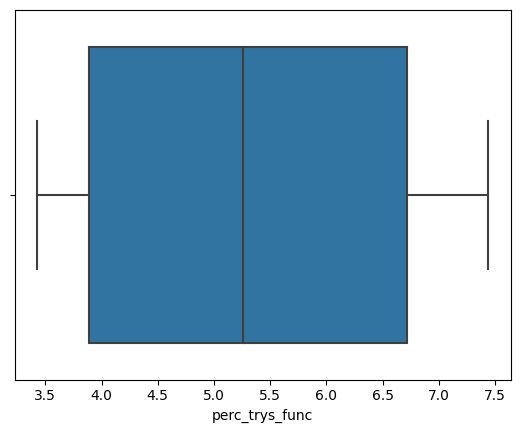

In [64]:
#make a boxplot of a numerical column of  a dataframe:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_grp["perc_trys_func"])
plt.show()



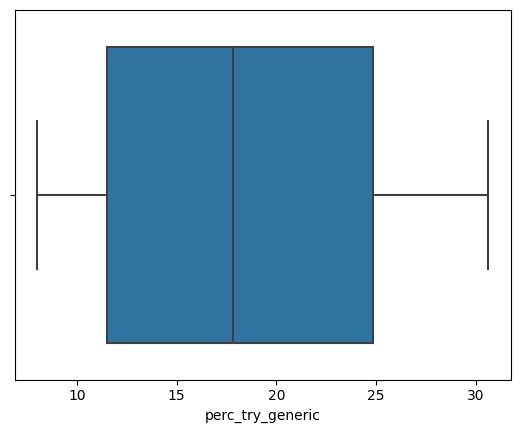

In [65]:
#make a boxplot of a numerical column of  a dataframe:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df_grp["perc_try_generic"])
plt.show()

